In [2]:
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt

Case 1: Beta-Bonimal (unknown p)

In [3]:
from scipy.stats import binom, beta

1) Sampling Density

Every statistical inference or prediction should always start first with the assumption on  sampling density , i.e. data generating process. In this case, we have a data set from a classical coin toss,  yi∈{0,1} , where  yi=1  with a probability  p , and our goal is to make Bayesian inference on the parameter  p .

In [4]:
# population parameter
p = 0.3
# generate toy sample
N = 15
np.random.seed(101)
data = binom.rvs(1,p, size=N)
print(data)
print(data.size)
print(data.sum())

[0 0 0 0 0 1 0 1 1 0 0 0 0 1 1]
15
5


2) Prior Belief

Prior belief can be in any form (flat, peaked, skewed, bimodal...) as long as the belief satistifies the fundamental axioms of probability. We choose beta distribution to express our belief solely because of its analytic convenience, that is, the resulting posterior can be integrated.

Text(0, 0.5, 'p(theta)')

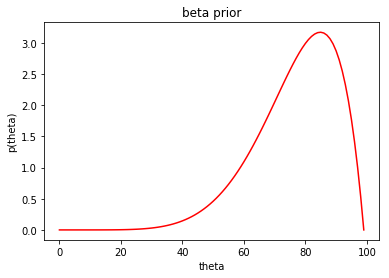

In [5]:
# choose your belief parameter
a= 7; b= 2

prior = beta(a, b)
theta = np.linspace(0,1,100)
plt.plot(prior.pdf(theta), color='r')
plt.title('beta prior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

Text(0, 0.5, 'p(theta)')

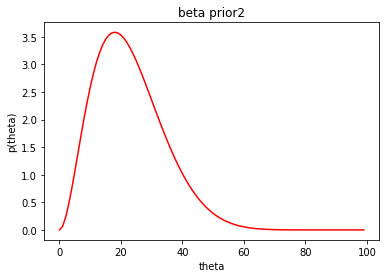

In [6]:
# you can always reflect other belief by tweaking your parameter;
a2= 3; b2= 10

prior2 = beta(a2, b2)
theta = np.linspace(0,1,100)
plt.plot(prior2.pdf(theta), color='r')
plt.title('beta prior2')
plt.xlabel('theta')
plt.ylabel('p(theta)')

3) Likelihood (Sampling Density)

Once you have specified your belief, you need to consider  "how likely"  the data is at each point of  p . What you would really come in handy is a plot where every possible choice of  p  is on x-axis and the y-axis shows "how likely the data came from that choice of  p . Likelihood does exactly this.

(0, 0.0005)

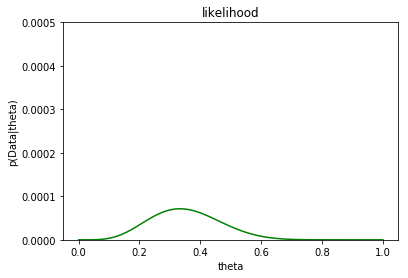

In [7]:
# scipy stats package does not allow for plotting pdf-theta so we need to define formula directly.
def likelihood(D, p):
    N = D.size; suc = D.sum()
    theta = np.linspace(0,1,100)
    return p**suc * (1-p)**(N-suc) # note that we neglected the constant as it will be canceled out in appling Bayes Rule

plt.plot(theta, likelihood(data, theta), color='g')
plt.title("likelihood")
plt.xlabel("theta")
plt.ylabel("p(Data|theta)")
plt.ylim(0,0.0005)

4) Posterior: Updated Belief

The posterior is defined by strictly applying Bayes Rule;  p(θ|D)=p(θ)p(D|θ)∫p(θ)p(D|θ)dθ . This is in most cases analytically intractable, but in this case where we have a  conjugacy  between the belief distribution and the sampling distribution, this simply reduces to updating belief paratemers; a, b. Otherwise we have to approximate  p(θ|D)  or use numerical methods, such as MCMC

Text(0, 0.5, 'p(theta)')

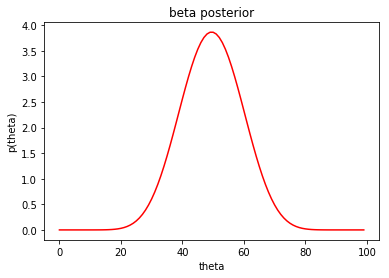

In [8]:
# Belief update
a_pos = a + data.sum()
b_pos = b + data.size - data.sum()

posterior = beta(a_pos, b_pos)
theta = np.linspace(0,1,100)
plt.plot(posterior.pdf(theta), color='r')
plt.title('beta posterior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

(0, 4)

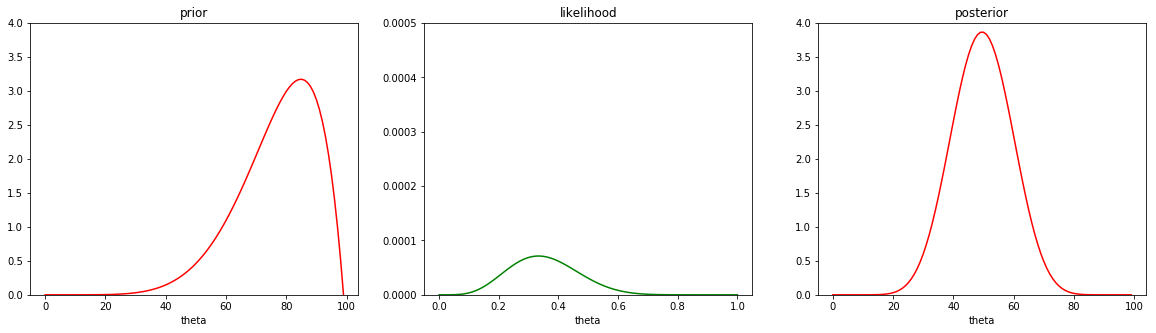

In [9]:
# in a nutshell;
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.plot(prior.pdf(theta), color='r')
ax1.set_title('prior')
ax1.set_xlabel('theta')
ax1.set_ylim(0,4)

ax2 = fig.add_subplot(132)
ax2.plot(theta, likelihood(data, theta), color='g')
ax2.set_title('likelihood')
ax2.set_xlabel('theta')
ax2.set_ylim(0,0.0005)

ax3 = fig.add_subplot(133)
ax3.plot(posterior.pdf(theta), color='r')
ax3.set_title('posterior')
ax3.set_xlabel('theta')
ax3.set_ylim(0,4)

(HW) Case 2: Gamma-Gaussian (unknow mu)

In [10]:
from scipy.stats import norm

1) Sampling Density

In [11]:
# population parameter
mu=20 ;sigma = 3

# generate toy sample
N = 100
np.random.seed(101)
data = norm.rvs(mu, sigma, size=N)
xbar=np.mean(data)
lmda = 1/np.std(data)
print(data)
print(data.size)
print(data.sum())
print(xbar)
print(lmda)

[28.121 21.884 22.724 21.511 21.953 19.042 17.456 21.818 13.945 22.22
 21.586 18.233 20.566 17.723 17.2   22.865 20.572 25.936 27.818 22.051
 20.908 25.081 14.882 16.523 19.595 21.172 20.501 20.554 22.423 20.219
 21.916 20.989 18.509 17.738 17.17  21.454 19.65  25.705 20.714 25.99
 17.02  20.59  16.59  20.001 23.078 19.53  19.905 21.949 26.465 18.169
 17.734 18.961 20.441 18.562 21.676 23.074 17.222 25.589 16.599 21.831
 21.158 26.252 18.87  20.691 22.044 23.105 19.907 25.82  16.984 17.775
 20.561 17.801 15.851 24.447 22.884 13.576 22.978 23.577 16.86  23.878
 15.597 18.518 19.512 21.457 21.177 20.664 17.434 24.626 21.999 18.385
 18.294 24.222 21.925 17.285 18.827 23.085 14.082 17.399 22.162 16.331]
100
2049.9109641269333
20.49910964126933
0.32242912123266526


2) Prior Belief

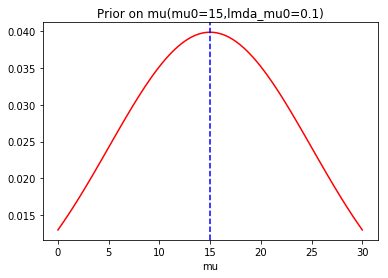

In [16]:
# choose your own belief parameters
mu0 = 15 ; lmda_mu0= 0.1
nprior= norm(loc=mu0, scale=1/lmda_mu0)
xaxis = np.linspace(0, 30, 100)
plt.plot(xaxis,nprior.pdf(xaxis), color='r')
plt.title("Prior on mu(mu0=15,lmda_mu0=0.1)")
plt.xlabel("mu")
plt.axvline(15, color = 'b', linestyle = '--')

3) Likelihood (Sampling Density)

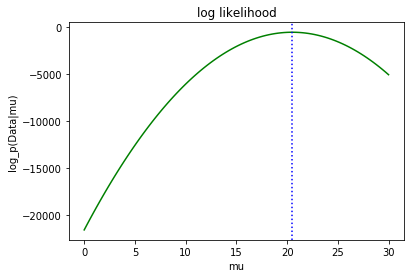

In [22]:
def likelihood(x, mu):
    lh = 0 
    for i in x:
        lh += np.log(norm.pdf(i, mu, 1))
    return lh

plt.plot(xaxis, likelihood(data, xaxis), color='g')
plt.title("log likelihood")
plt.xlabel("mu")
plt.ylabel("log_p(Data|mu)")
plt.axvline(xbar, color = 'b', linestyle = ':')

4) Posterior: Updated Belief

Text(0.5, 0, 'mu')

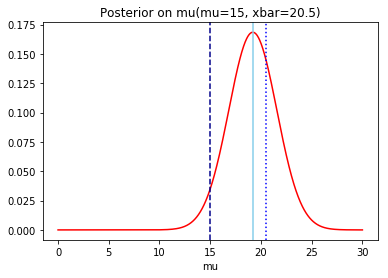

In [23]:
lmda_mu1 = lmda_mu0 + lmda

mu1 = (mu0 * lmda_mu0 + xbar * lmda)/lmda_mu1

posterior = norm(loc=mu1, scale=1/lmda_mu1)

xaxis2 = np.linspace(0, 30, 1000)
plt.plot(xaxis2, posterior.pdf(xaxis2), color='r')
plt.axvline(15, color = 'darkblue', linestyle = '--')
plt.axvline(mu1, color = 'skyblue')
plt.axvline(xbar, color = 'b', linestyle = ':')
plt.title("Posterior on mu(mu=15, xbar=20.5)")
plt.xlabel("mu")

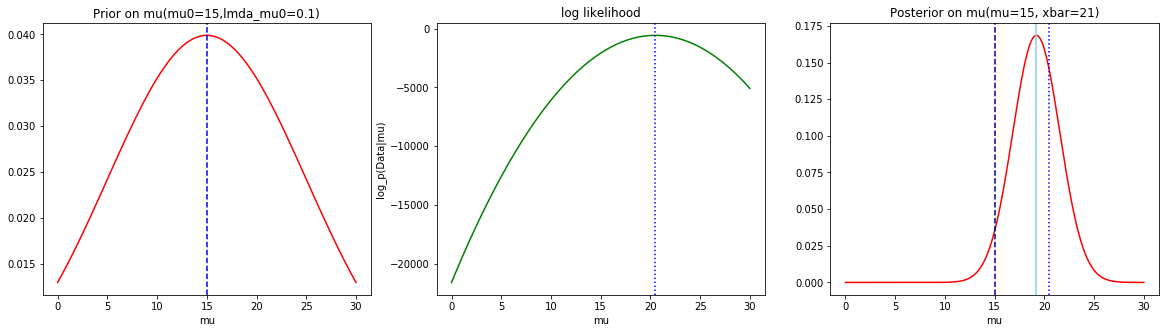

In [21]:
# in a nutshell;
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131)
ax1.plot(xaxis, nprior.pdf(xaxis), color='r')
ax1.set_title('Prior on mu(mu0=15,lmda_mu0=0.1)')
ax1.set_xlabel('mu')
ax1.axvline(15, color = 'b', linestyle = '--')

ax2 = fig.add_subplot(132)
ax2.plot(xaxis, likelihood(data, xaxis), color='g')
ax2.set_title('log likelihood')
ax2.set_xlabel('mu')
ax2.set_ylabel("log_p(Data|mu)")
ax2.axvline(xbar, color = 'b', linestyle = ':')

ax3 = fig.add_subplot(133)
ax3.plot(xaxis2, posterior.pdf(xaxis2), 'r')
ax3.set_title('Posterior on mu(mu=15, xbar=21)')
ax3.set_xlabel('mu')
ax3.axvline(15, color = 'darkblue', linestyle = '--')
ax3.axvline(mu1, color = 'skyblue')
ax3.axvline(xbar, color = 'b', linestyle = ':')